## Module

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
from glob import glob

## Datasets and Data_Preprocessing
### 스탯 설명
<table align="left">
    <tr>
        <th>WAR</th>
        <th>평가수단(승리기여도)</th>
        <th>|</th>
        <th>PA</th>
        <th>타석</th>
    </tr>
    <tr>
        <th>AVG</th>
        <th>타율</th>
        <th>|</th>
        <th>AB</th>
        <th>타수</th>
    </tr>
    <tr>
        <th>OPS</th>
        <th>출루율+장타율</th>
        <th>|</th>
        <th>H</th>
        <th>안타</th>
    </tr>
    <tr>
        <th>R</th>
        <th>득점</th>
        <th>|</th>
        <th>RBI</th>
        <th>타점</th>
    </tr>
    <tr>
        <th>SB</th>
        <th>도루</th>
        <th>|</th>
        <th>SF</th>
        <th>희생플라이</th>
    </tr>
</table>

In [2]:
%cd C:/Users/sdsd0/Desktop/scrappping(whoscored)/data
player_list = glob("re_data/*.csv")
stats_list = [
        "Unnamed: 0",
        "year",
        "team",
        "age",
        "G",
        "PA",
        "AB",
        "R",
        "HIT",
        "HIT_2",
        "HIT_3",
        "HOME_RUN",
        "BASE",
        "RBI",
        "SB",
        "CS",
        "HBP",
        "IBB",
        "SO",
        "GDP",
        "SH",
        "SF",
        "AVG",
        "OBP",
        "SLG",
        "OPS",
        "wOBA",
        "wRC",
        "WAR",
        "Name",
    ]
df1 = pd.DataFrame(columns=stats_list)
for i in player_list:
    df = pd.read_csv(f"{i}")
    if len(df)<10:
        continue
    name = i.replace('re_data\\','')
    name = name.replace('.csv','')
    df["Name"] = name
    df1 = pd.concat([df1, df])
df1 = df1.drop(["Unnamed: 0"],axis=1)
df1 = df1.drop(["Unnamed: 0.1"],axis=1)
def fill(stats):
    if stats==" ":
        return 0
    elif stats==0:
        return 0
    else:
        return float(stats)
    
def plus(year):
    return int(year+1)
df1["AVG"] = df1["AVG"].apply(fill)
df1["OBP"] = df1["OBP"].apply(fill)
df1["OPS"] = df1["OPS"].apply(fill)
df1["SLG"] = df1["SLG"].apply(fill)
df1["OPS"] = df1["OPS"].apply(fill)
df1["wOBA"] = df1["wOBA"].apply(fill)
df1["wRC"] = df1["wRC"].apply(fill)
df1["SB"] = df1["SB"].apply(fill)
df1["R"] = df1["R"].apply(fill)
df1["WAR"] = df1["WAR"].apply(fill)
df1["year"] = df1["year"].apply(plus)
df1 = df1[df1["year"]<9]
df1.head(10)

C:\Users\sdsd0\Desktop\scrappping(whoscored)\data


,year,team,age,G,PA,AB,R,HIT,HIT_2,HIT_3,...,SH,SF,AVG,OBP,SLG,OPS,wOBA,wRC,WAR,Name
0,1,삼성,24,123,468,414,74.0,124,23,8,...,11,0,0.300,0.365,0.466,0.832,0.362,127.5,4.50,강동우
1,2,삼성,26,13,28,20,3.0,2,0,0,...,0,0,0.100,0.357,0.100,0.457,0.273,55.5,0.02,강동우
2,3,삼성,27,125,403,347,54.0,87,15,2,...,2,1,0.251,0.348,0.357,0.705,0.331,87.6,1.68,강동우
3,4,삼성,28,130,521,466,75.0,134,23,3,...,7,1,0.288,0.352,0.408,0.760,0.338,106.7,3.29,강동우
4,5,삼성,29,130,520,443,61.0,118,19,4,...,15,4,0.266,0.349,0.388,0.737,0.329,93.9,2.47,강동우
5,6,삼성,30,132,497,438,59.0,129,22,1,...,7,1,0.295,0.367,0.370,0.737,0.341,101.0,1.86,강동우
6,7,삼성,31,125,429,367,61.0,88,15,3,...,13,3,0.240,0.322,0.346,0.668,0.302,79.0,0.75,강동우
7,8,두산,32,118,456,393,36.0,98,12,2,...,9,4,0.249,0.330,0.305,0.635,0.298,84.1,0.70,강동우
0,1,롯데,19,3,6,5,0.0,0,0,0,...,1,0,0.000,0.000,0.000,0.000,0.000,-133.3,-0.13,강민호
1,2,롯데,20,104,230,214,20.0,52,11,2,...,9,0,0.243,0.267,0.341,0.608,0.269,54.6,0.21,강민호


## model 1
#### 2 >> 4
## model 2
#### 1 >> 2 >> 4 
## model 3
#### 3 >> 4  
## model 4
#### 4 >> 8

In [3]:
#train1 2->4
#train2 3->4
#train3 1->2

train_1 = df1[df1["year"]<=2]
test_1 = df1[(df1["year"]>2)&(df1["year"]<=4)]
train_2 = df1[df1["year"]<=3]
test_2 = df1[(df1["year"]>3)&(df1["year"]<=4)]
train_3 = df1[df1["year"]<=1]
test_3 = df1[(df1["year"]>1)&(df1["year"]<=2)]


def datasets(dataset, presure):
    data = list()
    ds_value = list(dataset.values)

    for i in range(0,len(dataset),presure):
        data.append(list(ds_value[i])+list(ds_value[i+1]))
    return np.array(data)

## Model1
#### train:2 result:2

In [29]:
X_train_1 = train_1.iloc[:200]
X_test_1 = train_1.iloc[200:]
y_train_1 = test_1.iloc[:200]
y_test_1 = test_1.iloc[200:]
X_train_1 = X_train_1[["WAR", "year","age"]]
X_test_1 = X_test_1[["WAR", "year","age"]]
y_train_1 = y_train_1[["WAR"]]
y_test_1 = y_test_1[["WAR"]]

lin_reg = ElasticNet(alpha=0.01)
lin_reg.fit(X_train_1, y_train_1)
y_pred_1 = lin_reg.predict(train_1[["WAR", "year","age"]])

## Model2
#### train:3 result:1

In [32]:
X_train_2 = train_2[["WAR","year","age"]]
X_train_2 = datasets(X_train_2, 3)
pred_train = X_train_2
test_2 = test_2[["WAR"]]
# check train_test
# print(len(X_train_2))
# print(len(test_2))

X_test_2 = X_train_2[100:]
y_test_2 = test_2[100:]
y_train_2 = test_2[:100]
X_train_2 = X_train_2[:100]


lin_reg = ElasticNet(alpha=0.01)
lin_reg.fit(X_train_2, y_train_2)
y_pred_2 = lin_reg.predict(pred_train)

## Model3
#### train:1 result:1

In [23]:
X_train_3 = train_3.iloc[:100]
X_test_3 = train_3.iloc[100:]
y_train_3 = test_3.iloc[:100]
y_test_3 = test_3.iloc[100:]
X_train_3 = X_train_3[["WAR", "year","age"]]
X_test_3 = X_test_3[["WAR", "year","age"]]
y_train_3 = y_train_3[["WAR"]]
y_test_3 = y_test_3[["WAR"]]

lin_reg = ElasticNet(alpha=0.01)
lin_reg.fit(X_train_3, y_train_3)
y_pred_3 = lin_reg.predict(train_3[["WAR", "year","age"]])

## Data Generate(ex. 1년차일경우 2년차로 증대후 4년차로 증대)

In [56]:
d = {"Name": train_3["Name"].values,"WAR":y_pred_3, "year": [2]*141}
model_3_df = pd.DataFrame(d)
model_3_df = pd.concat([train_3, model_3_df])
model_3_df = model_3_df[["WAR", "Name", "year"]]

In [55]:
d = {"Name": train_3["Name"].values,"WAR":y_pred_2, "year": [4]*141}
model_2_df = pd.DataFrame(d)
model_2_df = pd.concat([train_2, model_2_df])
model_2_df = model_2_df[["WAR", "Name", "year"]]

In [61]:
d = {"Name": train_1["Name"].values,"WAR":y_pred_1, "year": [3,4]*141}
model_1_df = pd.DataFrame(d)
model_1_df = pd.concat([train_1, model_1_df])
model_1_df = model_1_df[["WAR", "Name", "year"]]
# model_1_df[model_1_df["Name"]=="강동우"]

## Target Model
#### train:4 result:4

In [78]:
train = df1[df1["year"]<=4]
test = df1[df1["year"]>4]

X_train = train.iloc[:284]
X_test = train.iloc[284:]
y_train = test.iloc[:284]
y_test = test.iloc[284:]
X_train = X_train[["WAR", "year","age"]]
X_test = X_test[["WAR", "year","age"]]
y_train = y_train[["WAR"]]
y_test = y_test[["WAR"]]

In [79]:
# Machine Learning Model
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

# poly = PolynomialFeatures(degree=4, include_bias=True)
# X_train = poly.fit_transform(X_train)
# X_test = poly.fit_transform(X_test)

## Model

In [80]:
lin_reg = ElasticNet(alpha=0.01)
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(train[["WAR", "year", "age"]])

In [81]:
len(y_pred)

564

In [82]:
x_pred = df1[df1["year"]<=4]
x_pred = x_pred[["WAR", "Name",'year']]
x_pred

,WAR,Name,year
0,4.50,강동우,1
1,0.02,강동우,2
2,1.68,강동우,3
3,3.29,강동우,4
0,-0.13,강민호,1
...,...,...,...
3,4.60,홍현우,4
0,0.85,황재균,1
1,0.14,황재균,2
2,3.50,황재균,3


In [85]:
d = {"WAR": y_pred, "Name": x_pred["Name"].values, "year": [5,6,7,8]*141}
df_2 = pd.DataFrame(d)
df_2 = pd.concat([x_pred, df_2])
df_2[df_2["Name"]=="강동우"]

,WAR,Name,year
0,4.500000,강동우,1
1,0.020000,강동우,2
2,1.680000,강동우,3
3,3.290000,강동우,4
0,3.418058,강동우,5
1,2.495313,강동우,6
2,2.598261,강동우,7
3,2.692980,강동우,8


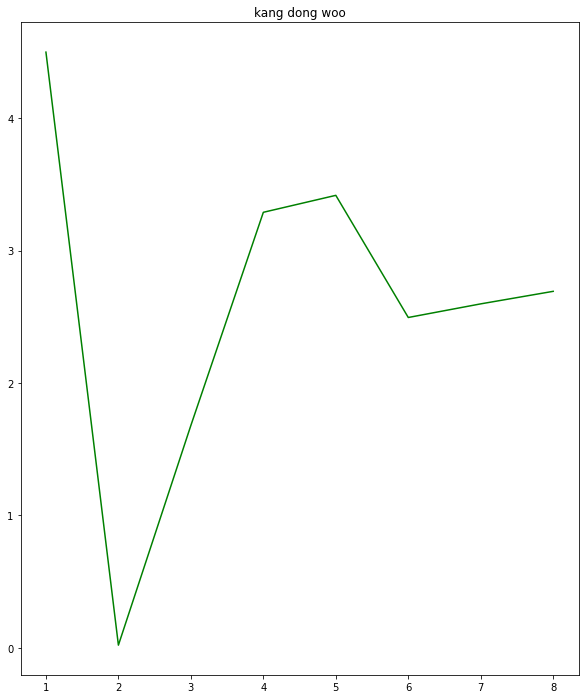

In [87]:
import matplotlib.pyplot as plt
x = df_2[df_2["Name"]=="강동우"]["year"]
y = df_2[df_2["Name"]=="강동우"]["WAR"]
plt.figure(figsize=(10, 12))
plt.title("kang dong woo")
plt.plot(x,y,c='green')
plt.show()